In [101]:
import numba as nb
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os

In [102]:
if not os.path.isdir("figures"):
            os.makedirs("figures")

In [103]:
plt.figure()
plt.close('all')
plt.rcParams["font.size"] = 22

In [129]:
my_center = -0.8 + 0.0j
my_extent = 3.0 + 3.0j

resulution = 256*2^20
# XY-quadrant that will be inspected
my_width = resulution  # (x axis); real numbers
my_height = resulution# (y axis); imaginary

my_max_iter = resulution # convergence test search depth

In [130]:
@nb.vectorize
def mandelbrot(c, max_iter=my_max_iter):
    z = 0

    # test for divergence with finite iterations
    for k in range(max_iter):
        z = z**2 + c
        if np.absolute(z) > 2.0:  # if true then complex number diverges and is not part of set
            break

    return k

def generate_complex_grid(width=my_width, height=my_height, center=my_center, extent=my_extent):

    scale = max(extent.real / width, extent.imag / height)
    real_index_grid, imag_index_grid = np.meshgrid(np.arange(0, width), np.arange(0, height))
    c_grid = center + (real_index_grid - width // 2 + (imag_index_grid - height //2) * 1j) * scale
    return c_grid


def compute_mandelbrot(width=my_width, height=my_height, center=my_center, extent=my_extent, max_iter=my_max_iter):

    niters = np.zeros((width, height), int)
    scale = max(extent.real / width, extent.imag / height)

    c_grid = generate_complex_grid(width=my_width, height=my_height, center=my_center, extent=my_extent)

    return mandelbrot(c_grid, max_iter)

In [131]:
niters = compute_mandelbrot() # 17 ms

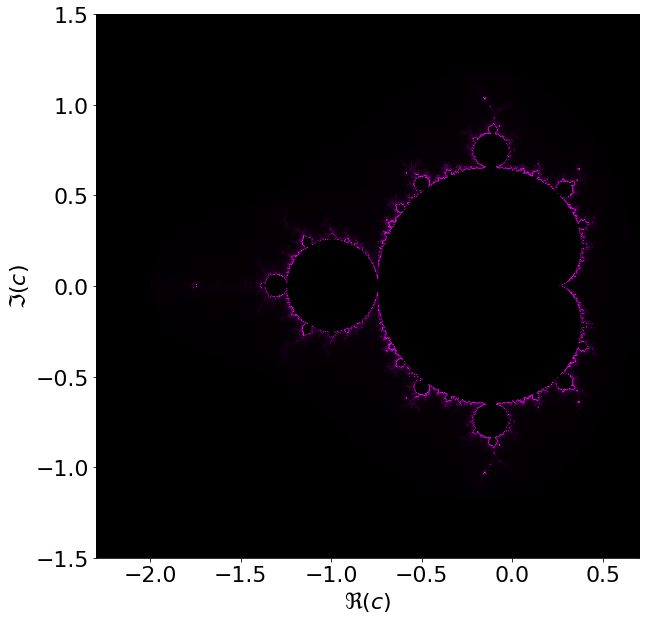

In [135]:


fig, ax = plt.subplots(1,1, figsize=(10,10))
c0, c1 = my_center - my_extent / 2, my_center + my_extent / 2
plot_extent = (c0.real, c1.real, c0.imag, c1.imag)

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["black","magenta","black"]) # cyan, lawngreen, white, magenta
ax.imshow(niters, origin='lower', extent=plot_extent, cmap=cmap)
ax.set_xlabel("$\Re(c)$")
ax.set_ylabel("$\Im(c)$")
# plt.show()
plt.savefig('figures/mandelbrot_magenta_final.svg', bbox_inches="tight")